In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
And=lambda a,b: np.logical_and(a,b)

# Importando as bases

In [3]:
discentes=pd.read_csv('data/Discentes_2013-2019.csv',encoding='latin1')

/home/gustavo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
docentes=pd.read_csv('data/Docentes_2013-2019.csv',encoding='latin1')

colunas=['AN_BASE',
 'CD_PROGRAMA_IES',
 'TP_SEXO_DOCENTE',
 'AN_NASCIMENTO_DOCENTE',
 'DS_TIPO_NACIONALIDADE_DOCENTE',
 'AN_TITULACAO','SG_ENTIDADE_ENSINO']

docentes=docentes[colunas]

/home/gustavo/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
teses=pd.read_csv('data/Teses-Dissertassoes_2013-2019.csv',encoding='latin1')

# Gerando as features para a base de Discentes

In [6]:
def contar_homem(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_mulher(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(0)
        else:
            L.append(1)
    return L

def contar_brasiliero(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_estrangeiro(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(0)
        else:
            L.append(1)
    return L

def media_especial(array):
    '''Tira a média dos valores do array ignorando-se os zeros.'''
    valores_nao_nulos=[]
    for i in array:
        if i!=0:
            valores_nao_nulos.append(i)
    return np.mean(valores_nao_nulos)

In [7]:
discentes['Dis_Homens']=contar_homem(discentes.TP_SEXO_DISCENTE)
discentes['Dis_Mulheres']=contar_mulher(discentes.TP_SEXO_DISCENTE)
discentes['Dis_Brasileiros']=contar_brasiliero(discentes.DS_TIPO_NACIONALIDADE_DISCENTE)
discentes['Dis_Estrangeiros']=contar_estrangeiro(discentes.DS_TIPO_NACIONALIDADE_DISCENTE)
discentes['Quantidade_Discentes']=[1 for i in range(len(discentes))]

In [8]:
discentes=discentes.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'Dis_Homens':np.sum,'Dis_Mulheres':np.sum,
                                                              'Dis_Brasileiros':np.sum, 'Dis_Estrangeiros':np.sum,
                                                             'Quantidade_Discentes':np.sum,
                                                            'QT_MES_TITULACAO':media_especial,
                                                            'CD_AREA_AVALIACAO':np.max,'CS_STATUS_JURIDICO':np.max,
                                                            'AN_NASCIMENTO_DISCENTE':np.mean,'NM_REGIAO':np.max,
                                                            'SG_UF_PROGRAMA':np.max,
                                                            'CD_CONCEITO_PROGRAMA':np.max})


#esse aviso aparece porque tem uns programas que só tem valor zero a coluna QT_MES_TITULACAO
#(zero indica que o progama ainda não foi terminado )

/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
def proporcao_homens(df):
    L=[]
    for i in range(len(df)):
        L.append(df.Dis_Homens[i]/df.Quantidade_Discentes[i])
    return L

def razao_aluno_tempo(df):
    '''Retorna a razão aluno/tempo médio de titulação'''
    L=[]
    for i in range(len(df)):
        L.append(df.Quantidade_Discentes[i]/df.QT_MES_TITULACAO[i])
    return L

In [10]:
discentes.insert(7,'Dis_Prop_Homens',proporcao_homens(discentes),True)
discentes.insert(8,'Dis_Aluno_Tempo',razao_aluno_tempo(discentes),True)

In [11]:
discentes.head()

,CD_PROGRAMA_IES,AN_BASE,Dis_Homens,Dis_Mulheres,Dis_Brasileiros,Dis_Estrangeiros,Quantidade_Discentes,Dis_Prop_Homens,Dis_Aluno_Tempo,QT_MES_TITULACAO,CD_AREA_AVALIACAO,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA
0,10001018002P1,2013,29,48,77,0,77,0.376623,1.889019,40.761905,9,FEDERAL,1981.000000,NORTE,RO,3
1,10001018002P1,2014,26,43,68,1,69,0.376812,2.193154,31.461538,9,FEDERAL,1983.275362,NORTE,RO,3
2,10001018002P1,2015,33,57,88,2,90,0.366667,3.082192,29.200000,9,FEDERAL,1984.311111,NORTE,RO,3
3,10001018002P1,2016,28,53,80,1,81,0.345679,2.685083,30.166667,9,FEDERAL,1986.493827,NORTE,RO,3
4,10001018002P1,2017,43,64,106,1,107,0.401869,3.763819,28.428571,9,FEDERAL,1987.579439,NORTE,RO,4


# Gerando as features para a base de docentes

In [12]:
docentes.head()

,AN_BASE,CD_PROGRAMA_IES,TP_SEXO_DOCENTE,AN_NASCIMENTO_DOCENTE,DS_TIPO_NACIONALIDADE_DOCENTE,AN_TITULACAO,SG_ENTIDADE_ENSINO
0,2019,10001018017P9,FEMININO,1968,BRASILEIRO,2004.0,UNIR
1,2019,10001018016P2,MASCULINO,1963,BRASILEIRO,2012.0,UNIR
2,2019,53045009001P3,FEMININO,1972,BRASILEIRO,2013.0,UNIR
3,2019,10001018004P4,MASCULINO,1978,BRASILEIRO,2007.0,UNIR
4,2019,10001018041P7,MASCULINO,1976,BRASILEIRO,2004.0,UNIR


In [13]:
def contar_homem(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_mulher(array):
    L=[]
    for i in array:
        if i=='MASCULINO':
            L.append(0)
        else:
            L.append(1)
    return L

def contar_brasiliero(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(1)
        else:
            L.append(0)
    return L

def contar_estrangeiro(array):
    L=[]
    for i in array:
        if i=='BRASILEIRO':
            L.append(0)
        else:
            L.append(1)
    return L

In [14]:
docentes['Do_Homens']=contar_homem(docentes.TP_SEXO_DOCENTE)
docentes['Do_Mulheres']=contar_mulher(docentes.TP_SEXO_DOCENTE)
docentes['Do_Brasileiros']=contar_brasiliero(docentes.DS_TIPO_NACIONALIDADE_DOCENTE)
docentes['Do_Estrangeiros']=contar_estrangeiro(docentes.DS_TIPO_NACIONALIDADE_DOCENTE)
docentes['Quantidade_Docentes']=[1 for i in range(len(docentes))]

In [15]:
docentes=docentes.groupby(['CD_PROGRAMA_IES','AN_BASE'],as_index=False).agg({'Do_Homens':np.sum,'Do_Mulheres':np.sum,
                                                              'Do_Brasileiros':np.sum, 'Do_Estrangeiros':np.sum,
                                                             'Quantidade_Docentes':np.sum,
                                                            'AN_NASCIMENTO_DOCENTE':np.mean, 
                                                            'SG_ENTIDADE_ENSINO':np.max})

In [16]:
docentes.head()

,CD_PROGRAMA_IES,AN_BASE,Do_Homens,Do_Mulheres,Do_Brasileiros,Do_Estrangeiros,Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO
0,10001018002P1,2013,15,10,25,0,25,1967.560000,UNIR
1,10001018002P1,2014,14,8,22,0,22,1966.954545,UNIR
2,10001018002P1,2015,14,8,22,0,22,1971.136364,UNIR
3,10001018002P1,2016,13,7,20,0,20,1972.200000,UNIR
4,10001018002P1,2017,14,8,22,0,22,1973.727273,UNIR


# Gerando para a base de teses e dissertações

In [17]:
teses=teses[teses.NR_PAGINAS<5000] #tirando os valores estranhos(só são 23)

In [18]:
def contar_lingua_estrangeira(array):
    '''Conta quantos traballhos são esritos em língua estrangeira'''
    L=[]
    for i in array:
        if i=='PORTUGUES':
            L.append(0)
        else:
            L.append(1)
    return L

teses['Lingua_estrangeira']=contar_lingua_estrangeira(teses.NM_IDIOMA)

teses['Quantidade_Trabalhos']=[1 for i in range(len(teses))]

In [19]:
teses=teses.groupby(['CD_PROGRAMA','AN_BASE'],as_index=False).agg({'ID_SUBTIPO_PRODUCAO':np.max,'NM_SUBTIPO_PRODUCAO':np.max,
                                                           'IN_TRABALHO_MESMA_AREA':np.max,'NR_PAGINAS':media_especial,
                                                           'Lingua_estrangeira':np.sum,
                                                                  'Quantidade_Trabalhos':np.sum})

/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gustavo/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [20]:
teses.head()

,CD_PROGRAMA,AN_BASE,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,Lingua_estrangeira,Quantidade_Trabalhos
0,10001018002P1,2013.0,2.0,TESE,0.0,NaN,0,21
1,10001018002P1,2014.0,2.0,TESE,1.0,80.0,0,13
2,10001018002P1,2015.0,2.0,TESE,0.0,NaN,0,20
3,10001018002P1,2016.0,2.0,TESE,0.0,NaN,0,18
4,10001018002P1,2017.0,2.0,TESE,1.0,NaN,0,21


In [21]:
teses.columns=['CD_PROGRAMA_IES',
 'AN_BASE',
 'ID_SUBTIPO_PRODUCAO',
 'NM_SUBTIPO_PRODUCAO',
 'IN_TRABALHO_MESMA_AREA',
 'NR_PAGINAS',
 'Lingua_estrangeira','Quantidade_Trabalhos']

# Juntando as bases de docentes, discentes e teses

In [22]:
df=pd.merge(docentes,discentes,on=['CD_PROGRAMA_IES','AN_BASE'])

In [23]:
df=pd.merge(teses,df,on=['CD_PROGRAMA_IES','AN_BASE'])

In [24]:
para_deletar=[discentes,docentes,teses]
del para_deletar #esse é um jeito de forçar o garbage collector a remover esses dataframes da memória

In [25]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,Lingua_estrangeira,Quantidade_Trabalhos,Do_Homens,Do_Mulheres,...,Quantidade_Discentes,Dis_Prop_Homens,Dis_Aluno_Tempo,QT_MES_TITULACAO,CD_AREA_AVALIACAO,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA
0,10001018002P1,2013.0,2.0,TESE,0.0,NaN,0,21,15,10,...,77,0.376623,1.889019,40.761905,9,FEDERAL,1981.000000,NORTE,RO,3
1,10001018002P1,2014.0,2.0,TESE,1.0,80.0,0,13,14,8,...,69,0.376812,2.193154,31.461538,9,FEDERAL,1983.275362,NORTE,RO,3
2,10001018002P1,2015.0,2.0,TESE,0.0,NaN,0,20,14,8,...,90,0.366667,3.082192,29.200000,9,FEDERAL,1984.311111,NORTE,RO,3
3,10001018002P1,2016.0,2.0,TESE,0.0,NaN,0,18,13,7,...,81,0.345679,2.685083,30.166667,9,FEDERAL,1986.493827,NORTE,RO,3
4,10001018002P1,2017.0,2.0,TESE,1.0,NaN,0,21,14,8,...,107,0.401869,3.763819,28.428571,9,FEDERAL,1987.579439,NORTE,RO,4


# Criando features para as três bases juntas

## Docentes e discentes

In [26]:
def diferenca_idade(df):
    L=[]
    for i in range(len(df)):
        L.append(-df.AN_NASCIMENTO_DOCENTE[i]+df.AN_NASCIMENTO_DISCENTE[i])
    return L

def razao_aluno_prof(df):
    L=[]
    for i in range(len(df)):
        L.append(df.Quantidade_Discentes[i]/df.Quantidade_Docentes[i])
    return L   

In [27]:
df.insert(19,'diferenca_idade',diferenca_idade(df),True)
df.insert(20,'razao_aluno_prof',razao_aluno_prof(df),True)

In [28]:
x=df.groupby('CD_CONCEITO_PROGRAMA').mean()[['diferenca_idade','razao_aluno_prof']]

Text(0, 0.5, 'Conceito')

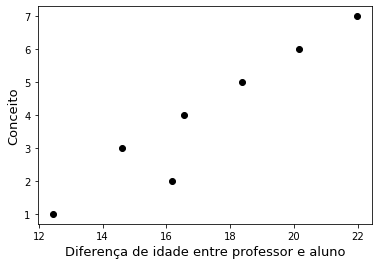

In [29]:
plt.scatter(x.diferenca_idade,x.index,color='black')
plt.xlabel('Diferença de idade entre professor e aluno',size=13)
plt.ylabel('Conceito',size=13)

Text(0, 0.5, 'Conceito')

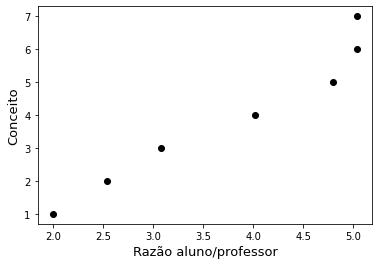

In [30]:
plt.scatter(x.razao_aluno_prof,x.index,color='black')
plt.xlabel('Razão aluno/professor',size=13)
plt.ylabel('Conceito',size=13)

# Teses e dissertaçoes

In [31]:
x=df.groupby('CD_CONCEITO_PROGRAMA').mean()[['NR_PAGINAS','Lingua_estrangeira','IN_TRABALHO_MESMA_AREA'
                                             ,'Quantidade_Trabalhos']]
conceito=x.index
paginas=x.NR_PAGINAS
lingua=x.Lingua_estrangeira
trabalho=x.IN_TRABALHO_MESMA_AREA
quantidade=x.Quantidade_Trabalhos

Text(0, 0.5, 'Conceito')

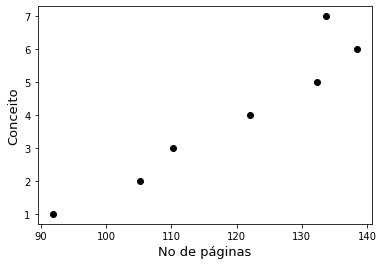

In [32]:
plt.scatter(paginas,conceito,color='black')
plt.xlabel('No de páginas',size=13)
plt.ylabel('Conceito',size=13)

Text(0, 0.5, 'Conceito')

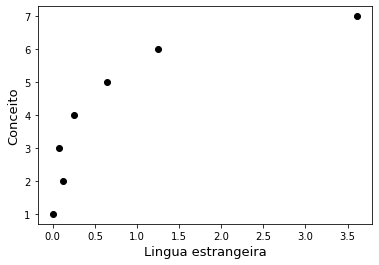

In [33]:
plt.scatter(lingua,conceito,color='black')
plt.xlabel('Lingua estrangeira',size=13)
plt.ylabel('Conceito',size=13)

Text(0, 0.5, 'Conceito')

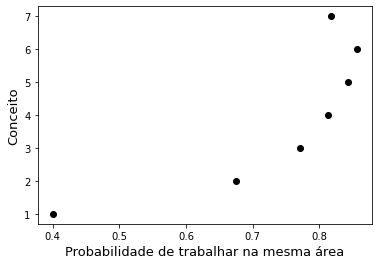

In [34]:
plt.scatter(trabalho,conceito,color='black')
plt.xlabel('Probabilidade de trabalhar na mesma área',size=13)
plt.ylabel('Conceito',size=13)

Text(0, 0.5, 'Conceito')

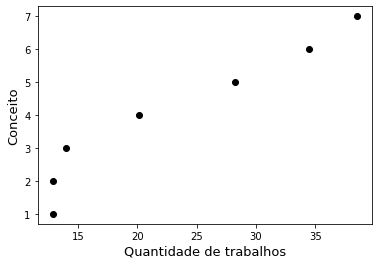

In [35]:
plt.scatter(quantidade,conceito,color='black')
plt.xlabel('Quantidade de trabalhos',size=13)
plt.ylabel('Conceito',size=13)

## Discentes e teses e dissertações

In [36]:
def pagina_por_aluno(df):
    L=[]
    for i in range(len(df)):
        L.append(df.NR_PAGINAS[i]/df.Quantidade_Docentes[i])
    return L  

In [37]:
df.insert(26,'pag_por_aluno',pagina_por_aluno(df),True)

In [38]:
df1=df.copy()
df1=df1.groupby('CD_CONCEITO_PROGRAMA',as_index=False).mean()
df1.head(8)

,CD_CONCEITO_PROGRAMA,AN_BASE,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,Lingua_estrangeira,Quantidade_Trabalhos,Do_Homens,Do_Mulheres,Do_Brasileiros,...,Dis_Estrangeiros,diferenca_idade,razao_aluno_prof,Quantidade_Discentes,Dis_Prop_Homens,Dis_Aluno_Tempo,QT_MES_TITULACAO,CD_AREA_AVALIACAO,pag_por_aluno,AN_NASCIMENTO_DISCENTE
0,1,2016.400000,9.933333,0.400000,91.856036,0.000000,12.933333,8.866667,7.733333,16.533333,...,0.000000,12.436163,1.997024,35.266667,0.386666,1.308465,26.403900,37.066667,6.884968,1980.309073
1,2,2016.863874,4.570681,0.675393,105.243541,0.120419,12.895288,11.314136,6.251309,17.282723,...,0.214660,16.187758,2.542592,39.900524,0.527719,1.348534,29.550355,21.643979,7.582920,1982.817463
2,3,2016.245333,3.669855,0.771952,110.314473,0.075478,13.986402,10.370131,7.563148,17.582277,...,0.323577,14.610056,3.078844,53.530537,0.455876,2.046062,26.333461,27.876930,6.885187,1983.168707
3,4,2016.178704,2.711307,0.812999,122.049082,0.257100,20.172854,13.230401,9.834698,22.463036,...,0.943410,16.563447,4.019242,88.043506,0.447259,2.924636,30.622909,26.800128,6.386393,1982.917857
4,5,2016.207307,2.204121,0.844095,132.304971,0.643585,28.215590,15.945837,12.025913,27.054376,...,2.049915,18.377629,4.796197,125.884027,0.433144,3.728516,34.833213,26.119159,5.915904,1983.117175
5,6,2016.111389,1.981518,0.857143,138.458461,1.250749,34.471528,19.234266,12.688312,30.749251,...,4.275724,20.145725,5.039157,156.167333,0.456707,4.295139,36.855484,23.114386,5.202878,1984.260092
6,7,2016.214912,1.992105,0.818421,133.648273,3.614035,38.506140,25.321930,14.335965,37.655263,...,7.623684,21.976771,5.032915,184.114035,0.502117,4.856393,38.535816,18.359649,4.239113,1985.632385


In [39]:
#tirando as colunas nada a ver

colunas=['CD_CONCEITO_PROGRAMA',
 'IN_TRABALHO_MESMA_AREA',
 'NR_PAGINAS',
 'Lingua_estrangeira',
 'Quantidade_Trabalhos',
 'Do_Homens',
 'Do_Mulheres',
 'Do_Brasileiros',
 'Do_Estrangeiros',
 'Quantidade_Docentes',
 'AN_NASCIMENTO_DOCENTE',
 'Dis_Homens',
 'Dis_Mulheres',
 'Dis_Brasileiros',
 'Dis_Estrangeiros',
 'Quantidade_Discentes',
 'diferenca_idade',
 'razao_aluno_prof',
 'Dis_Prop_Homens',
 'Dis_Aluno_Tempo',
 'QT_MES_TITULACAO',
 'pag_por_aluno',
 'AN_NASCIMENTO_DISCENTE']

df1=df1[colunas]


### **Isso é CORRELAÇÃO DE SPEARMAN, não de Pearson(r)**

Para quem tiver a curiosidade: 
https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman

"Pearson's correlation r measures the linear component of association.
Spearman's correlation uses ranks instead of the values. Roughly speaking, it measures 
the degree to which the two variables rise (or fall) together, regardless whether the relationship linear."


In [40]:
corr = df1.corr(method='spearman')
x=corr[['CD_CONCEITO_PROGRAMA']]
x.style.background_gradient(cmap='seismic').set_precision(4)

,CD_CONCEITO_PROGRAMA
CD_CONCEITO_PROGRAMA,1.0000
IN_TRABALHO_MESMA_AREA,0.8929
NR_PAGINAS,0.9643
Lingua_estrangeira,0.9643
Quantidade_Trabalhos,0.9643
Do_Homens,0.9643
Do_Mulheres,0.8929
Do_Brasileiros,1.0000
Do_Estrangeiros,1.0000
Quantidade_Docentes,1.0000


In [51]:
df.to_csv('/data/docentes_dicentes_teses.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/data/docentes_dicentes_teses.csv'